In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
import numpy as np

In [2]:
data = pd.read_csv('../data/table.csv')
data.head()

,Tool,year_pub,num_citations,citation_per_year,category,package_manager,required_expertise,type_of_URL
0,iSeqQC,2020,0,0.000000,Data quality control,none,++,1
1,qsmooth2,2018,29,14.500000,Data quality control,Bioconductor,++,1
2,FastQC,2018,75,37.500000,Data quality control,Anaconda,++,1
3,QC3,2014,64,10.666667,Data quality control,Anaconda,++,1
4,kPAL,2014,18,3.000000,Data quality control,Anaconda,++,1


In [3]:
data['year_pub'].value_counts()

2014    40
2013    31
2015    30
2016    22
2012    22
2011    21
2019    17
2018    15
2010    14
2017    13
2020     5
2009     3
2008     2
Name: year_pub, dtype: int64

In [4]:
data['required_expertise'].value_counts()

+++     112
++      101
+        19
none      3
Name: required_expertise, dtype: int64

In [5]:
data['type_of_URL'].value_counts()

1    156
2     79
Name: type_of_URL, dtype: int64

In [6]:
data['package_manager'].value_counts()

none                      150
Anaconda                   56
Anaconda, Bioconductor     20
Bioconductor                4
Anaconda, CRAN              2
CRAN                        1
pip                         1
Bioconductor, CRAN          1
Name: package_manager, dtype: int64

In [7]:
idx_group = data.groupby('category')['Tool'].count().reset_index().sort_values('Tool', ascending=False)
idx_group

,category,Tool
12,Transcriptome quantification,30
4,Differential expression,24
9,Read alignment,22
8,RNA splicing,21
3,Detecting circRNA,19
5,Fusion detection,18
1,Cell deconvolution,16
2,Data quality control,16
11,Transcriptome assembly,16
14,Visualization tools,15


# Cumulative graph

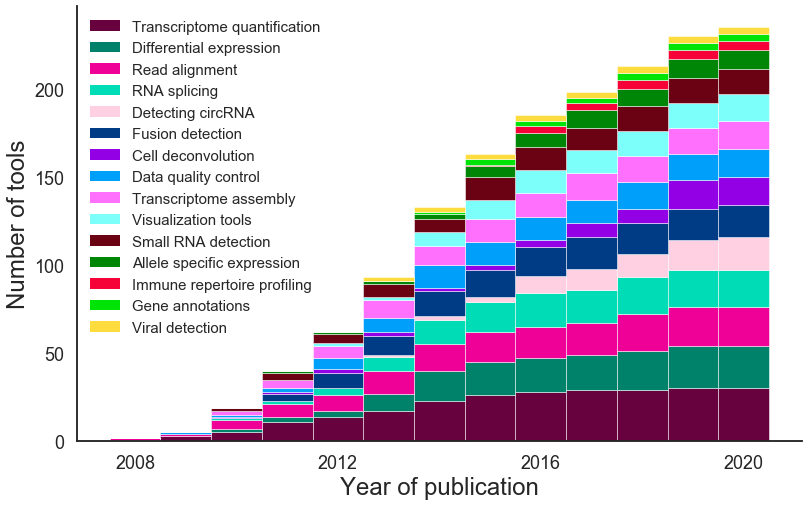

In [9]:
plt.figure(figsize=(13,8))

idx = range(min(data['year_pub']), max(data['year_pub'])+1)
by_year = data.groupby(['year_pub','category']).count()
by_year = by_year.xs('Tool', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
by_year = by_year.reindex(idx, method='ffill')
x = by_year.index

sns.set_style('white')
sns.set_context('talk')

E = by_year['Transcriptome quantification'].to_list()
F = by_year['Differential expression'].to_list()
B = by_year['Read alignment'].to_list()
G = by_year['RNA splicing'].to_list()
M = by_year['Detecting circRNA'].to_list()
L = by_year['Fusion detection'].to_list()
H = by_year['Cell deconvolution'].to_list()
A = by_year['Data quality control'].to_list()
D = by_year['Transcriptome assembly'].to_list()
N = by_year['Visualization tools'].to_list()
O = by_year['Small RNA detection'].to_list()
J = by_year['Allele specific expression'].to_list()
I = by_year['Immune repertoire profiling'].to_list()
C = by_year['Gene annotations'].to_list()
K = by_year['Viral detection'].to_list()

barWidth = 1
plt.bar(x, E, color='#68023F', edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, F, bottom=E, color='#008169', edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, B, bottom=[d+e for d,e in zip(E, F)], color='#EF0096', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, G, bottom=[d+e+b for d,e,b in zip(E,F,B)], color='#00DCB5', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, M, bottom=[d+e+b+g for d,e,b,g in zip(E,F,B,G)], color='#FFCFE2', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, L, bottom=[d+e+b+f+g for d,e,b,f,g in zip(E,F,B,G,M)], color='#003C86', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, H, bottom=[d+e+b+f+g+j for d,e,b,f,g,j in zip(E,F,B,G,M,L)], color='#9400E6', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, A, bottom=[d+e+b+f+g+j+a for d,e,b,f,g,j,a in zip(E,F,B,G,M,L,H)], color='#009FFA', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, D, bottom=[d+e+b+f+g+j+c+a for d,e,b,f,g,j,c,a in zip(E,F,B,G,M,L,H,A)], color='#FF71FD', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, N, bottom=[d+e+b+f+g+j+c+a+k for d,e,b,f,g,j,c,a,k in zip(E,F,B,G,M,L,H,A,D)], color='#7CFFFA', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, O, bottom=[d+e+b+f+g+j+c+a+k+l for d,e,b,f,g,j,c,a,k,l in zip(E,F,B,G,M,L,H,A,D,N)], color='#6A0213', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, J, bottom=[d+e+b+f+g+j+c+a+k+l+h for d,e,b,f,g,j,c,a,k,l,h in zip(E,F,B,G,M,L,H,A,D,N,O)], color='#008607', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, I, bottom=[d+e+b+f+g+j+c+a+k+l+h+x for d,e,b,f,g,j,c,a,k,l,h,x in zip(E,F,B,G,M,L,H,A,D,N,O,J)], color='#F60239', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, C, bottom=[d+e+b+f+g+j+c+a+k+l+h+x+y for d,e,b,f,g,j,c,a,k,l,h,x,y in zip(E,F,B,G,M,L,H,A,D,N,O,J,I)], color='#00E307', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, K, bottom=[d+e+b+f+g+j+c+a+k+l+h+x+y+z for d,e,b,f,g,j,c,a,k,l,h,x,y,z in zip(E,F,B,G,M,L,H,A,D,N,O,J,I,C)], color='#FFDC3D', 
        edgecolor='white', width=barWidth, linewidth=.5)
k = plt.Rectangle((0,0),1,1,fc="#FFDC3D", edgecolor = 'none')
c = plt.Rectangle((0,0),1,1,fc="#00E307", edgecolor = 'none')
i = plt.Rectangle((0,0),1,1,fc='#F60239',  edgecolor = 'none')
j = plt.Rectangle((0,0),1,1,fc='#008607',  edgecolor = 'none')
o = plt.Rectangle((0,0),1,1,fc='#6A0213',  edgecolor = 'none')
n = plt.Rectangle((0,0),1,1,fc='#7CFFFA',  edgecolor = 'none')
d = plt.Rectangle((0,0),1,1,fc='#FF71FD',  edgecolor = 'none')
a = plt.Rectangle((0,0),1,1,fc='#009FFA',  edgecolor = 'none')
h = plt.Rectangle((0,0),1,1,fc='#9400E6',  edgecolor = 'none')
l = plt.Rectangle((0,0),1,1,fc='#003C86',  edgecolor = 'none')
m = plt.Rectangle((0,0),1,1,fc='#FFCFE2',  edgecolor = 'none')
g = plt.Rectangle((0,0),1,1,fc='#00DCB5',  edgecolor = 'none')
b = plt.Rectangle((0,0),1,1,fc='#EF0096',  edgecolor = 'none')
f = plt.Rectangle((0,0),1,1,fc='#008169',  edgecolor = 'none')
e = plt.Rectangle((0,0),1,1,fc='#68023F',  edgecolor = 'none')

legend=plt.legend([e,f,b,g,m,l,h,a,d,n,o,j,i,c,k], ['Transcriptome quantification','Differential expression',
                                                  'Read alignment','RNA splicing','Detecting circRNA',
                                                  'Fusion detection','Cell deconvolution',
                                                  'Data quality control','Transcriptome assembly',
                                                  'Visualization tools','Small RNA detection',
                                                  'Allele specific expression','Immune repertoire profiling',
                                                  'Gene annotations','Viral detection'],
               loc='best', prop={'size':15})
legend.draw_frame(False)

plt.ylabel("Number of tools", fontsize=24)
plt.xlabel("Year of publication", fontsize=24)

sns.despine()

plt.xticks(range(min(data['year_pub']), max(data['year_pub'])+2, 4), fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('../figures/figure4a.png', bbox_inches='tight')

# Domain-based required expertise

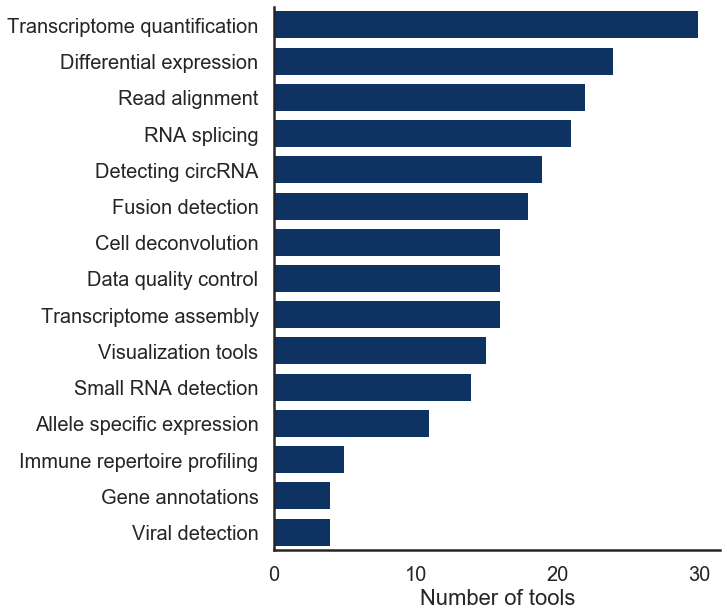

In [11]:
sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})
sns.set_context("poster")

sns.barplot(y='category',x="Tool",data=pd.read_csv("../data/count_by_cat.csv"),color='#00306F')
plt.xlabel("Number of tools", fontsize=22)
plt.ylabel("", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
sns.despine()
plt.savefig('../figures/figure4b.png', bbox_inches='tight', pad_inches=.5)

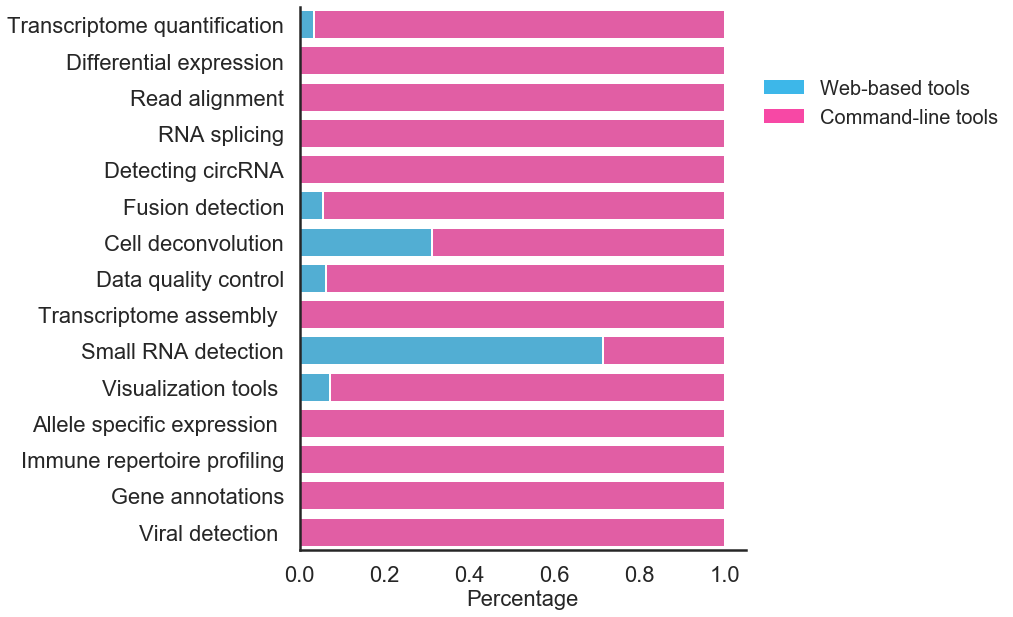

In [13]:
sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})
stacked_bar_data = pd.read_csv("../data/expertise_percent.csv")
#Plot 1 - background - "total" (top)
top = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "#F748A5")
#Plot3 - overlay - "bottom"
bottom = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.easy, color = "#3DB7E9")


topbar = plt.Rectangle((0,0),1,1,fc="#F748A5", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#3DB7E9',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Web-based tools','Command-line tools'],bbox_to_anchor=(1, .9),prop={'size':20})
l.draw_frame(False)
#plt.title("Required Computational Expertise", fontsize = 30)

sns.despine()
plt.xlabel("Percentage", fontsize=22)
plt.ylabel("")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.savefig('../figures/figure5a.png', bbox_inches='tight', pad_inches=.5)

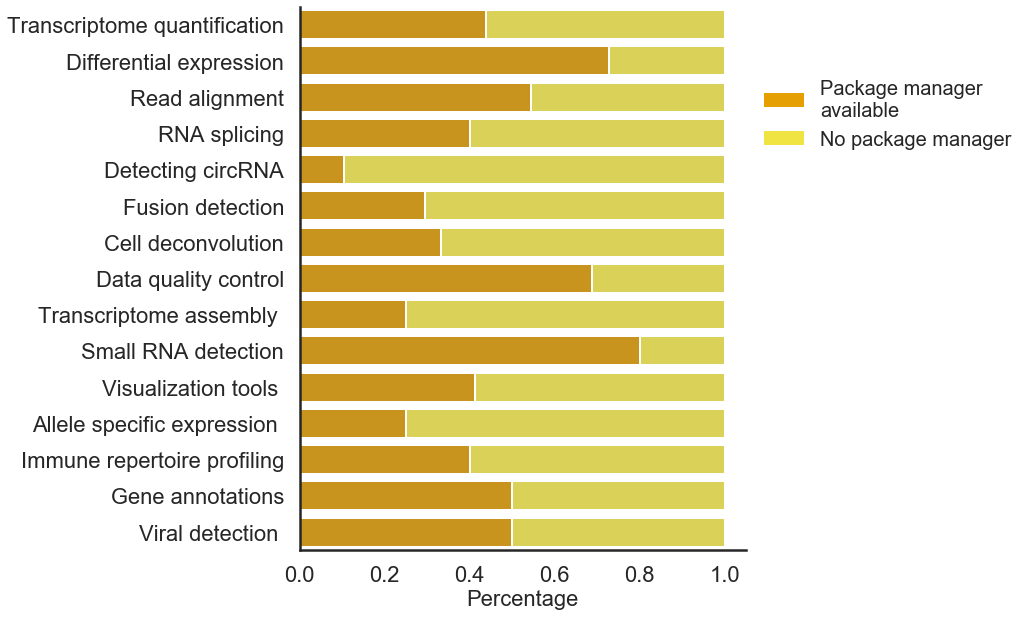

In [14]:
stacked_bar_data = pd.read_csv("../data/package_percent.csv")

sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})

#Plot
total = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "#F0E442")
available = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total - stacked_bar_data.none, 
                   color = "#E69F00")

total = plt.Rectangle((0,0),1,1,fc="#F0E442", edgecolor = 'none')
available = plt.Rectangle((0,0),1,1,fc='#E69F00',  edgecolor = 'none')

legend = plt.legend([available, total], ['Package manager\navailable','No package manager'], 
                    bbox_to_anchor=(1, .9), prop={'size':20})
legend.draw_frame(False)
#plt.title("Availability of Package Manager", fontsize = 30)

sns.despine()
plt.xlabel("Percentage",fontsize=22)
plt.ylabel("")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
    

plt.savefig('../figures/figure5d.png', bbox_inches='tight', pad_inches=.5)

# Pie chart

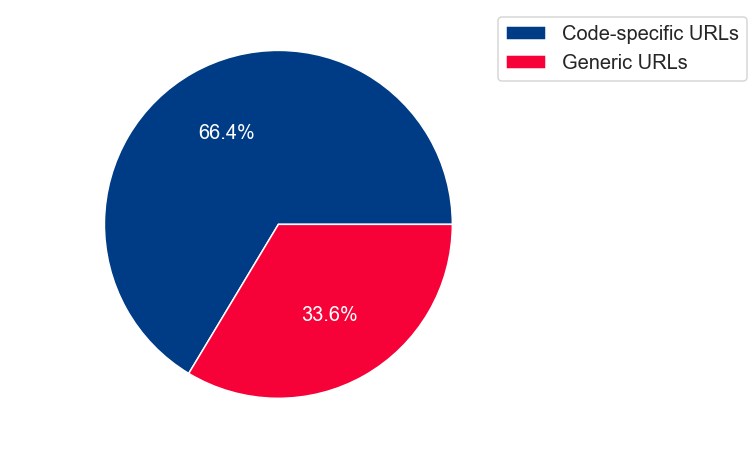

In [14]:
URL = pd.DataFrame({'ratio': [156, 79]}, index=['Code-specific URLs','Generic URLs'])
plot = URL.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%', textprops = {'color':"w"}, 
                              fontsize = 20, colors=["#003C86","#F60239"])
plt.legend(loc='best', bbox_to_anchor=(0, .8, 1.6, .2), fontsize = 20)
plt.ylabel("", color = "black")
#plt.title("Type of URLs", fontsize = 22)
plt.savefig('../figures/figure5b.png',bbox_inches='tight')

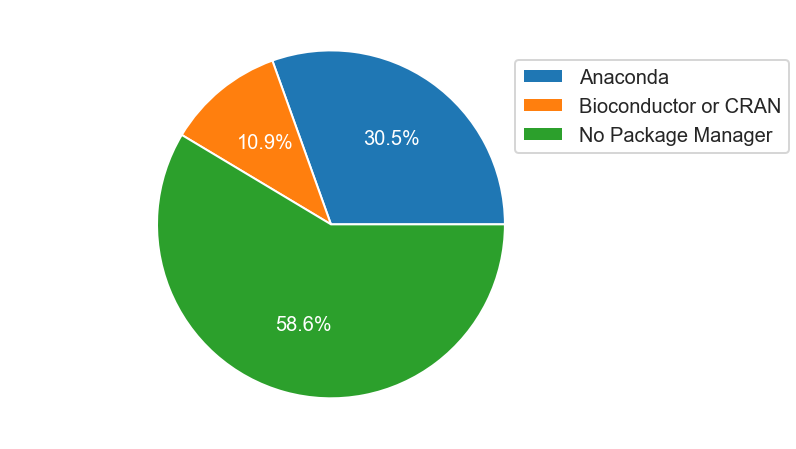

In [16]:
manager = pd.DataFrame({'Package Manager': [78,28,150]}, index=['Anaconda','Bioconductor or CRAN','No Package Manager'])
plot = manager.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%', textprops = {'color':"w"}, 
                              fontsize = 20)
plt.legend(loc='best', bbox_to_anchor=(.9, .9),fontsize = 20)
plt.ylabel("", color = "black")
#plt.title("Availability of Package Manager", fontsize = 22)
plt.savefig('../figures/figure5c.png',bbox_inches='tight')

# Citations

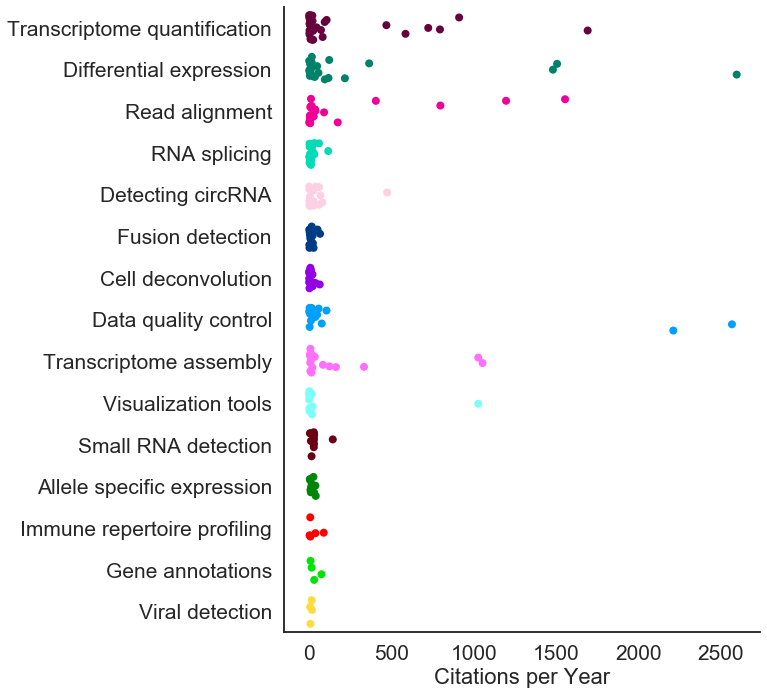

In [18]:
plt.figure(figsize=(11,10))

sns.set_style('white')
sns.set_context('talk')

color = ['#68023F','#008169','#EF0096','#00DCB5','#FFCFE2','#003C86','#9400E6','#009FFA','#FF71FD','#7CFFFA',
         '#6A0213','#008607','red',"#00E307",'#FFDC3D']
order=['Transcriptome quantification','Differential expression',
       'Read alignment','RNA splicing','Detecting circRNA',
       'Fusion detection','Cell deconvolution',
       'Data quality control','Transcriptome assembly',
       'Visualization tools','Small RNA detection',
       'Allele specific expression','Immune repertoire profiling',
       'Gene annotations','Viral detection']

ax = sns.stripplot(data = data, y = 'category', x = 'citation_per_year', 
                   order=order,
                   palette=color, size=8, jitter=.3)
#plt.xscale('log')
labels = ax.get_xticklabels()
#ax.set_yticklabels(labels, fontsize=22)
ax.set(ylabel = '', xlabel = "Citations per Year")
plt.yticks(fontsize=21)
plt.xticks(fontsize=21)
plt.xlabel("Citations per Year",fontsize=22)
plt.tight_layout()
sns.despine()

plt.savefig('../figures/figure4c.png', bbox_inches='tight', pad_inches=.5)

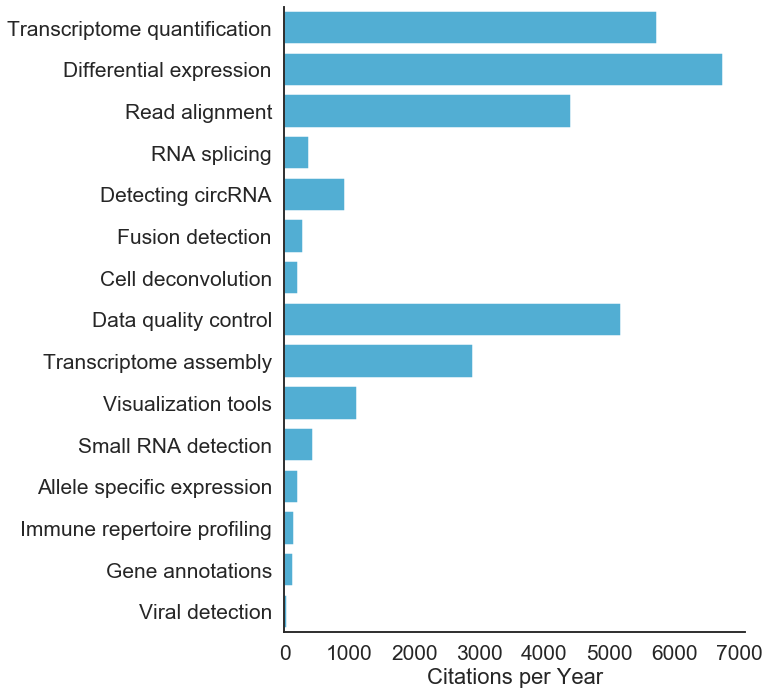

In [21]:
plt.figure(figsize=(11,10))

sns.set_style('white')
sns.set_context('talk')

ax = sns.barplot(data = data, y = 'category', x = 'citation_per_year', 
                   order=order, color="#3DB7E9", estimator=sum, ci=None)

ax.set(ylabel = '', xlabel = "Citations per Year")
plt.yticks(fontsize=21)
plt.xticks(fontsize=21)
plt.xlabel("Citations per Year",fontsize=22)
#plt.title("Number of citations per year", fontsize = 25)
plt.tight_layout()
sns.despine()
plt.savefig('../figures/citations_per_year.png', bbox_inches='tight', pad_inches=.5)

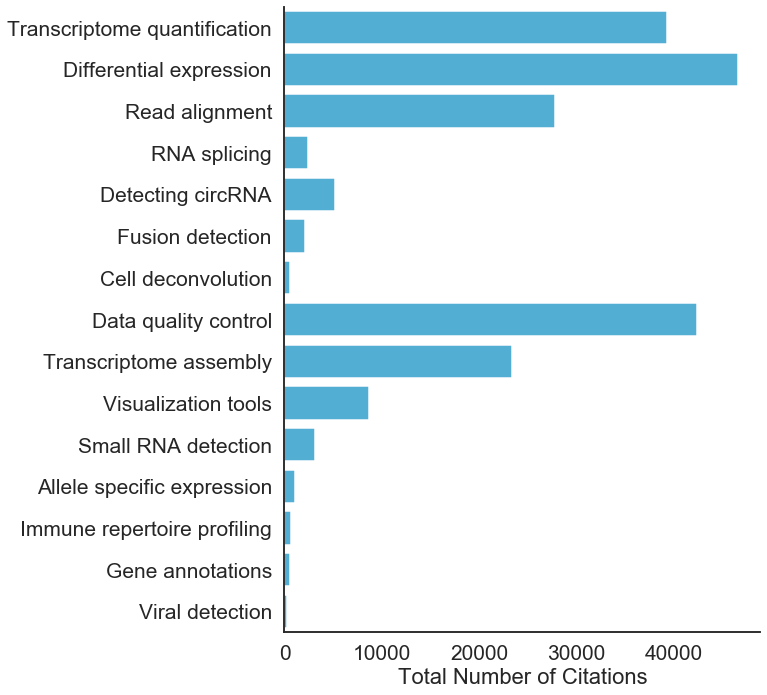

In [22]:
plt.figure(figsize=(11,10))

sns.set_style('white')
sns.set_context('talk')

ax = sns.barplot(data = data, y = 'category', x = 'num_citations', 
                   order=order, color="#3DB7E9", estimator=sum, ci=None)

ax.set(ylabel = '', xlabel = "Total Number of Citations")
plt.yticks(fontsize=21)
plt.xticks(fontsize=21)
plt.xlabel("Total Number of Citations",fontsize=22)
#plt.title("Number of citations per year", fontsize = 25)
plt.tight_layout()
sns.despine()
plt.savefig('../figures/sum_citations.png', bbox_inches='tight', pad_inches=.5)

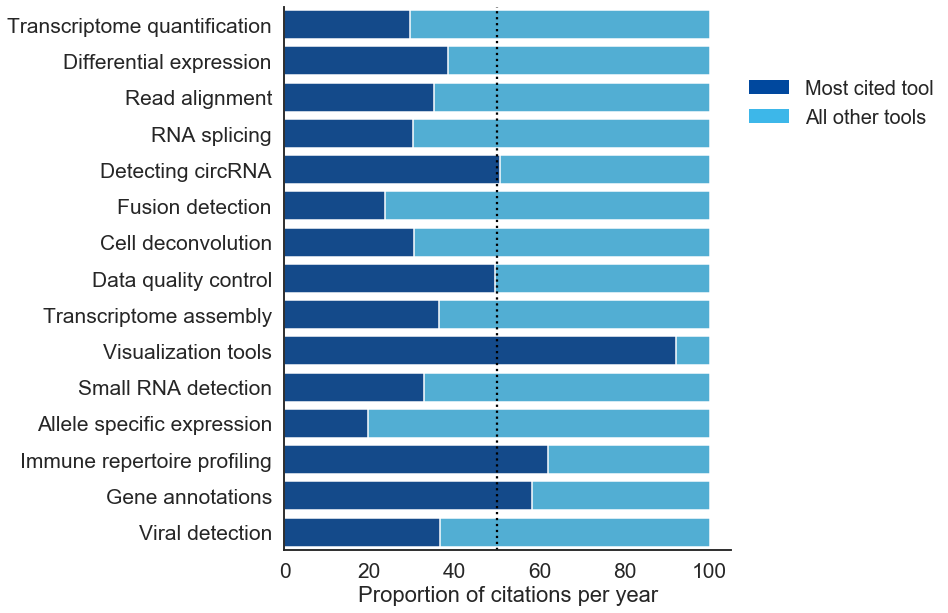

In [23]:
plt.figure(figsize=(8,10))

sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = data, y = 'category', x = 'citation_per_year', 
                   order=order, color="#3DB7E9", estimator=lambda x: x.sum() * 100 / x.sum(), ci=None)
most = sns.barplot(data=data, y = 'category', x = 'citation_per_year',
                   order=order, color = "#00489E", estimator=lambda x: x.max() * 100 / x.sum(), ci=None)

overall.axvline(x=50,color='black',ls='dotted')

overall = plt.Rectangle((0,0),1,1,fc="#3DB7E9", edgecolor = 'none')
most = plt.Rectangle((0,0),1,1,fc='#00489E',  edgecolor = 'none')



legend = plt.legend([most, overall], ['Most cited tool','All other tools'], 
                    bbox_to_anchor=(1, .9), prop={'size':20})
legend.draw_frame(False)

plt.yticks(fontsize=21)
plt.xticks(fontsize=21)
plt.xlabel("Proportion of citations per year",fontsize=22)
plt.ylabel("")
#plt.tight_layout()
sns.despine()
plt.savefig('../figures/most&all.png', bbox_inches='tight', pad_inches=.5)

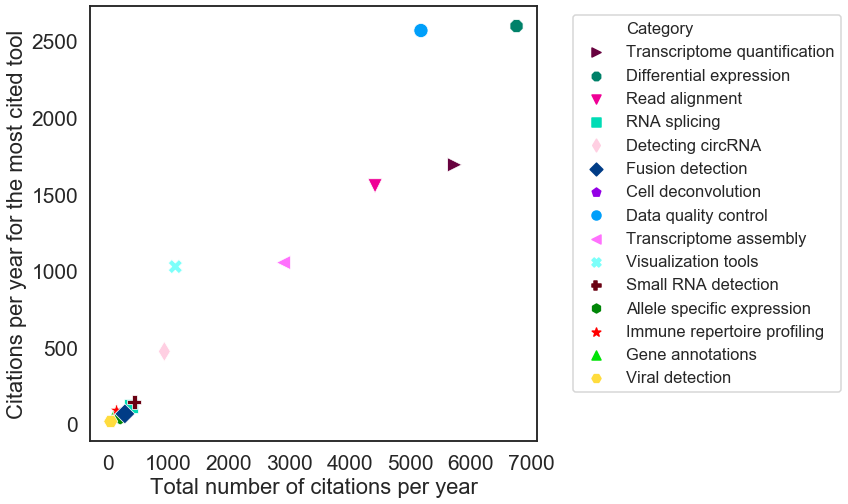

In [25]:
scatter = pd.read_csv('../data/scatterplot.csv')
plt.figure(figsize=(8,8))

sns.set_style('white')
sns.set_context('talk')

markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
size=range(0,900,60)
sns.scatterplot(data=scatter, x='citation_per_year', y='most', hue='Category', style='Category',
               hue_order=order, palette=color, markers=markers,s=200)

plt.legend(loc='upper right',bbox_to_anchor=(1.7, 1), ncol=1)
plt.yticks(fontsize=21)
plt.xticks(fontsize=21)
plt.xlabel("Total number of citations per year",fontsize=22)
plt.ylabel("Citations per year for the most cited tool",fontsize=22)
plt.savefig('../figures/most&all_scatter.png', bbox_inches='tight', pad_inches=.5)

In [26]:
import scipy.stats as stats
available = citation_merge.loc[citation_merge["package_manager"]=="Package manager available","citation_per_year"]
no = citation_merge.loc[citation_merge["package_manager"]=="No package manager","citation_per_year"]
mwu_results = stats.mannwhitneyu(available, no, alternative="greater")
print(mwu_results)

MannwhitneyuResult(statistic=8983.5, pvalue=1.4335991892294314e-07)


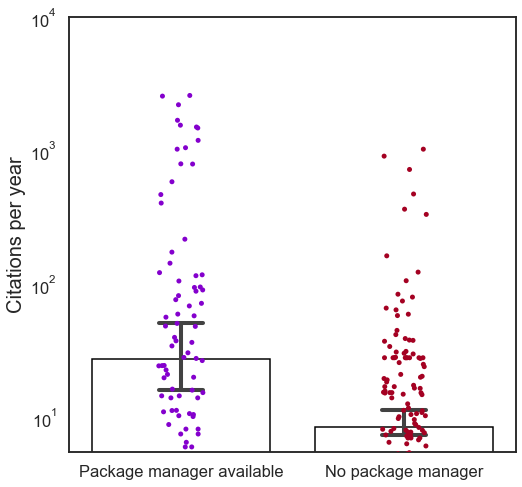

In [11]:
citation_merge = pd.read_csv('../data/table1.csv')
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
sns.barplot(x="package_manager", y="citation_per_year", data=citation_merge, 
            estimator=np.median, capsize=.2, facecolor="white", edgecolor="black",
           order=["Package manager available", "No package manager"])
sns.stripplot(data=citation_merge, x="package_manager", y="citation_per_year",
             order=["Package manager available", "No package manager"],
             palette=["#8400CD","#A40122"])
plt.yscale('log')
plt.ylim(ymax=10000)
plt.xlabel("")
plt.ylabel("Citations per year", fontsize=20)
plt.savefig('../figures/5e.png', bbox_inches='tight', pad_inches=.5)